# Prepare the data

In [3]:
# Load the dataset
import pandas as pd

df = pd.read_csv("C:\\Users\\xnoor\\OneDrive - Lambton College\\Documents\\GitHub\\smart-price-api\\datasets\\transformed_ebay_data.csv")

In [4]:
# Inspect data overview
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Unnamed: 0  num__Price  num__Feedback Score  cat__Listing Type_Auction  \
0           0   -0.072931            -0.302147                        0.0   
1           1   -0.064066            -0.302491                        0.0   
2           2   -0.064802            -0.303912                        0.0   
3           3   -0.070170             3.955687                        0.0   
4           4   -0.029952            -0.297746                        0.0   

   cat__Listing Type_AuctionWithBIN  cat__Listing Type_FixedPrice  \
0                               1.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               0.0                           1.0   

   cat__Listing Type_StoreInventory  cat__Shipping Type_Calculated  \
0                    

In [5]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127778 entries, 0 to 127777
Data columns (total 61 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Unnamed: 0                                              127778 non-null  int64  
 1   num__Price                                              127778 non-null  float64
 2   num__Feedback Score                                     127778 non-null  float64
 3   cat__Listing Type_Auction                               127778 non-null  float64
 4   cat__Listing Type_AuctionWithBIN                        127778 non-null  float64
 5   cat__Listing Type_FixedPrice                            127778 non-null  float64
 6   cat__Listing Type_StoreInventory                        127778 non-null  float64
 7   cat__Shipping Type_Calculated                           127778 non-null  float64
 8   ca

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0                              0
num__Price                              0
num__Feedback Score                     0
cat__Listing Type_Auction               0
cat__Listing Type_AuctionWithBIN        0
                                       ..
remainder__Store URL_flag               0
remainder__Large Image URL_flag         0
remainder__Super Size Image URL_flag    0
remainder__Exchange_rate                0
remainder__Price_in_USD                 0
Length: 61, dtype: int64


# Insight 1
How does the listing type (Fixed Price, Auction, Store Inventory) affect the final price and sales speed of items?

In [9]:
# Calculate average price and time duration for each listing type
listing_type_analysis = {}

for listing_type in ['cat__Listing Type_Auction', 'cat__Listing Type_AuctionWithBIN', 
                     'cat__Listing Type_FixedPrice', 'cat__Listing Type_StoreInventory']:
    # Filter data where the specific listing type is set to 1
    filtered_df = df[df[listing_type] == 1]
    
    # Calculate average price and time duration for the filtered data
    average_price = filtered_df['remainder__Price_in_USD'].mean()
    average_time_duration = filtered_df['remainder__Time duration'].mean()
    
    # Store the results in a dictionary
    listing_type_analysis[listing_type] = {
        'Average_Price': average_price,
        'Average_Time_Duration': average_time_duration
    }

# Convert the dictionary to a DataFrame for easier viewing
listing_type_analysis_df = pd.DataFrame(listing_type_analysis).T
listing_type_analysis_df.reset_index(inplace=True)
listing_type_analysis_df.columns = ['Listing Type', 'Average Price', 'Average Time Duration']

print(listing_type_analysis_df)

                       Listing Type  Average Price  Average Time Duration
0         cat__Listing Type_Auction      18.840036               7.108216
1  cat__Listing Type_AuctionWithBIN      61.981347               7.585570
2      cat__Listing Type_FixedPrice      27.768937             384.863075
3  cat__Listing Type_StoreInventory      16.619649            2560.305421


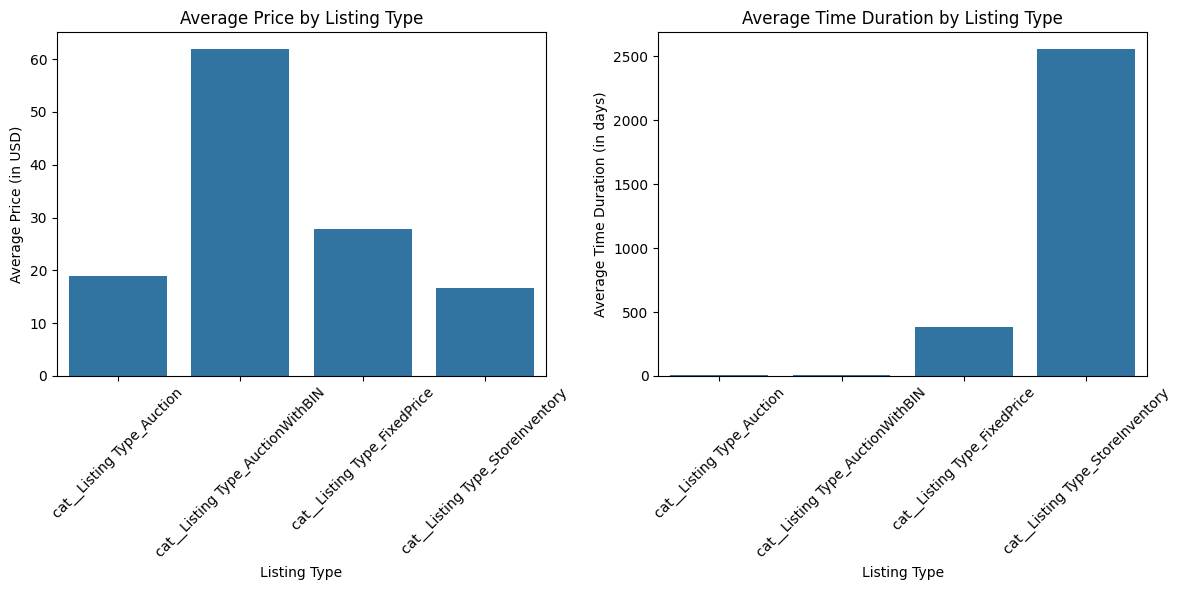

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the Average Price for each Listing Type
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(data=listing_type_analysis_df, x='Listing Type', y='Average Price')
plt.title('Average Price by Listing Type')
plt.xlabel('Listing Type')
plt.ylabel('Average Price (in USD)')
plt.xticks(rotation=45)

# Plotting the Average Time Duration for each Listing Type
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(data=listing_type_analysis_df, x='Listing Type', y='Average Time Duration')
plt.title('Average Time Duration by Listing Type')
plt.xlabel('Listing Type')
plt.ylabel('Average Time Duration (in days)')
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Observations**

* Auction vs. Fixed Price: 
    * Auction listings have a much lower average price ($18.84) but a quick turnaround, selling within about 7 days. 
    * In contrast, Fixed Price listings have a higher average price ($27.77) but take significantly longer to sell, with an average duration of 385 days. 
    
**Recommendation**    

If sellers want to sell faster, they should aim to sell in auctions. But if they are willing to wait, they can sell with Fixed Price. 

# Insight 2

How does the product condition type affect the final price and sales speed of items?

In [13]:
# Calculate average price and time duration for each condition
condition_analysis = {}

for condition in ['cat__Condition_New', 'cat__Condition_Used', 'cat__Condition_Like New', 'cat__Condition_Very Good', 'cat__Condition_Acceptable']:
    # Filter data where the specific condition is set to 1
    filtered_df = df[df[condition] == 1]
    
    # Calculate average price and time duration for the filtered data
    average_price = filtered_df['remainder__Price_in_USD'].mean()
    average_time_duration = filtered_df['remainder__Time duration'].mean()
    
    # Store the results in a dictionary
    condition_analysis[condition] = {
        'Average_Price': average_price,
        'Average_Time_Duration': average_time_duration
    }

# Convert the dictionary to a DataFrame for easier viewing
condition_analysis_df = pd.DataFrame(condition_analysis).T
condition_analysis_df.reset_index(inplace=True)
condition_analysis_df.columns = ['Condition', 'Average Price', 'Average Time Duration']

print(condition_analysis_df)

                   Condition  Average Price  Average Time Duration
0         cat__Condition_New      28.366587             344.050872
1        cat__Condition_Used      40.167453             370.719557
2    cat__Condition_Like New      15.560892             404.177327
3   cat__Condition_Very Good      12.216097             454.605369
4  cat__Condition_Acceptable       9.994610             311.856637


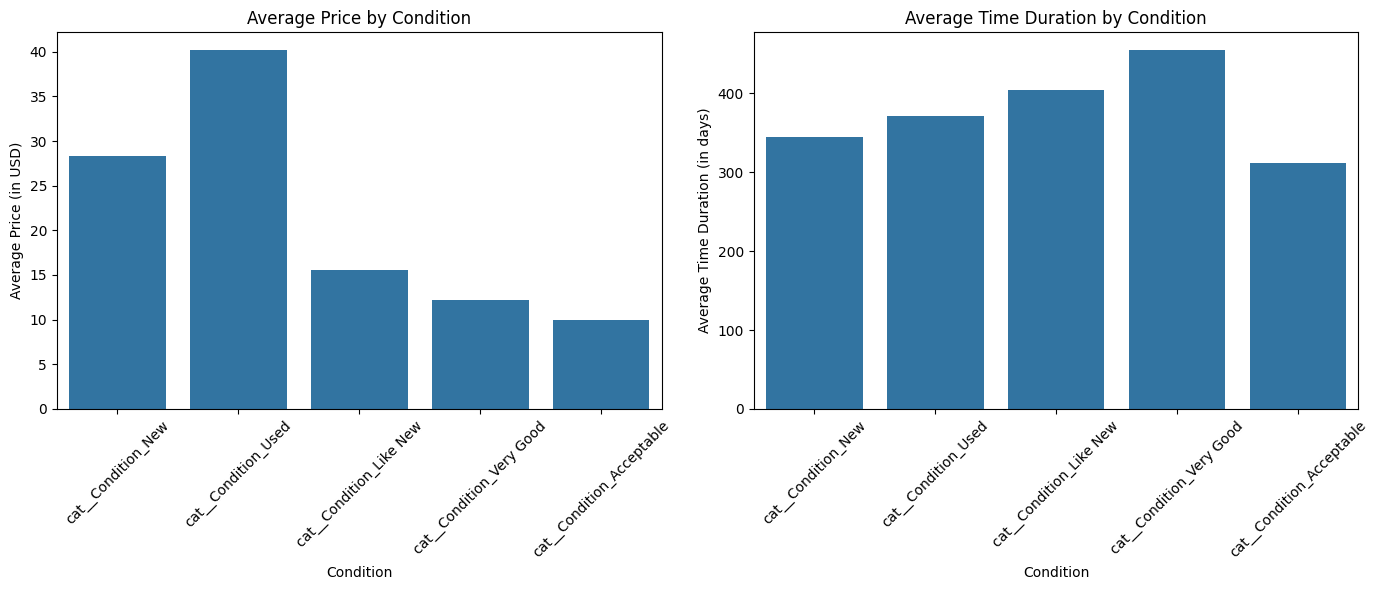

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# Plotting the Average Price for each Condition
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(data=condition_analysis_df, x='Condition', y='Average Price')
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price (in USD)')
plt.xticks(rotation=45)

# Plotting the Average Time Duration for each Condition
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(data=condition_analysis_df, x='Condition', y='Average Time Duration')
plt.title('Average Time Duration by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Time Duration (in days)')
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [20]:
# Filter the data for 'Used' items
used_items_df = df[df['cat__Condition_Used'] == 1]

# Sort the filtered data by price in descending order and drop duplicate items based on 'Title' (assuming 'Title' is a unique identifier for items)
top_used_items = used_items_df.sort_values(by='remainder__Price_in_USD', ascending=False).drop_duplicates(subset='remainder__Title').head(10)

# Select relevant columns to display
top_used_items = top_used_items[['remainder__Title', 'remainder__Category', 'remainder__Price_in_USD']]

# Display the top 10 highest-priced used items with their categories
print("Top 10 Highest-Priced Used Items and Categories:")
print(top_used_items)

Top 10 Highest-Priced Used Items and Categories:
                                         remainder__Title  \
103479  Tal Chess set USSR Chess Set Soviet Chess Set ...   
38173   Mighty Beanz Christmas Set Limited Edition 200...   
71825   JAN BARBOGLIO Christmas Camay Manger Handcraft...   
56334   Gibson J-150 Electric / Acoustic Guitar (2003)...   
116993  Monport GQ 30W (5.9" x 5.9") Fiber Laser Engra...   
38706   Mighty Beanz Limited Edition Of 300 2010 Chris...   
72814   Retired 48PC Living Home Christmas Nativity Se...   
102835  LOUIS VUITTON Tower Logo JENGA interior toy ga...   
109252  Turkish Chess Soviet Chess Chess set USSR Ches...   
107661  Franklin Mint Raj Chess Rare New Collection Co...   

              remainder__Category  remainder__Price_in_USD  
103479              Vintage Chess                100000.00  
38173                Mighty Beanz                  4447.77  
71825              Nativity Items                  3191.99  
56334   Acoustic Electric Guitars  

**Observation:**

 * Items in "New" condition have a lower average price ($28.37) compared to "Used" items ($40.17). 
 * Despite this, "New" items sell slightly faster, with an average duration of 344 days versus 371 days for "Used." 
 * This suggests that while "Used" items might fetch a higher price, they take slightly longer to sell.
 * We have further explored on categories where buyers are willing to pay a premium for "Used" items. 
 * The top 10 highest-priced "Used" items primarily belong to collectible categories, including vintage chess sets, rare Mighty Beanz, and nativity items. 
 * This suggests that buyers are willing to pay a premium for unique, hard-to-find, or nostalgic items, even in "Used" condition.

**Recommendation:**

* Sellers listing "Used" items in high-demand collectible categories should consider premium pricing to capture buyer interest, as these items tend to hold higher value due to rarity and collectible appeal, even though they are slight longer to sell. 

## Correlation Matrix

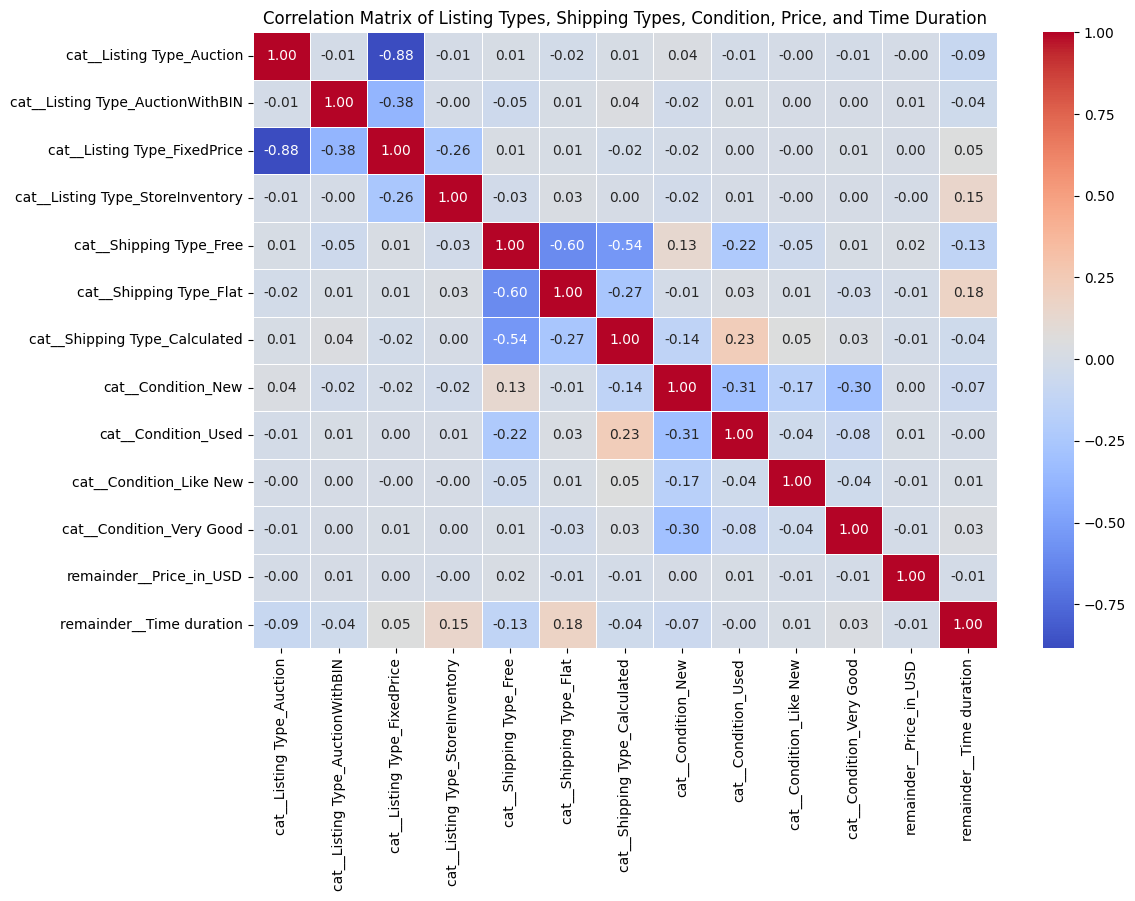

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant columns for the correlation matrix
# Ensure 'remainder__Price_in_USD' and 'remainder__Time duration' are included, along with the one-hot encoded listing types
correlation_columns = [
    'cat__Listing Type_Auction', 'cat__Listing Type_AuctionWithBIN', 
    'cat__Listing Type_FixedPrice', 'cat__Listing Type_StoreInventory',
    'cat__Shipping Type_Free', 'cat__Shipping Type_Flat', 'cat__Shipping Type_Calculated', 
    'cat__Condition_New', 'cat__Condition_Used', 'cat__Condition_Like New', 'cat__Condition_Very Good',
    'remainder__Price_in_USD', 'remainder__Time duration'
]

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Listing Types, Shipping Types, Condition, Price, and Time Duration')
plt.show()